The goal is to do binary classification on the make_moons dataset from sklearn.

It is utilized a neural nerwork based on relu and sigmoid activation functions

In [1]:
from mlswarm import neuralnet 

#DATASET-------------------------------
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X, Y = make_moons(n_samples = 2000, noise=0.2, random_state=100)
Y = Y.reshape((Y.shape[0],1))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

In [4]:
nn_architecture = [
    {"input_dim": 2, "output_dim": 5, "activation": "relu"},
    {"input_dim": 5, "output_dim": 10, "activation": "relu"},
    {"input_dim": 10, "output_dim": 5, "activation": "relu"},
    {"input_dim": 5, "output_dim": 1, "activation": "sigmoid"},
]

#CREATE NEURAL NETWORK
nn = neuralnet(nn_architecture)

#INITIALIZE CLOUD WITH 150 PARTICLES ACCORDING TO XAVIER INITIALIZATION
nn.init_cloud(N = 150)

#TRAINING
nn.train(X = X_train, Y = Y_train, 
          method = "swarm_derivfree", 
          max_epochs= 200, n_batches = 1, batch_size = X_train.shape[0],
          learning_rate = 5, var_epsilon = 0,
          cost_type = "rmse", #or binary_cross_entropy
          kernel_a = "auto", alpha_init = 0, alpha_rate = 1, beta = 0, gamma = 1, 
          verbose = False)

Finding kernel constant...
Kernel constant found: 0.01

Training started...
Maximum amount of epochs reached

Function value at cloud mean: 0.02777960571575693
Cost function evaluated 30000 times

The clock time (CPU time) for train_nn was 68.97405 (274.56250) seconds


Test set accuracy using particle 0: 0.97250
Test set accuracy using cloud mean: 0.97250


<Figure size 432x288 with 0 Axes>

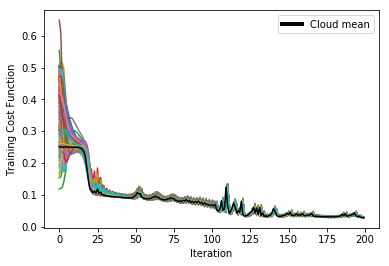

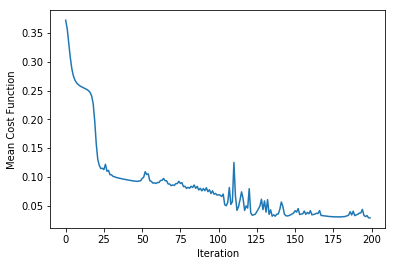

In [9]:
#PLOT COST HISTORY
nn.plot_cost_history()

#ACCURACY ON TEST SET USING PARTICLE 0 WEIGHTS
nn.prediction_accuracy_particle(X_test, Y_test, acc_type = "sigmoid_accuracy", particle = 0)

#ACCURACY ON TEST SET USING CLOUD MEAN WEIGHTS
nn.prediction_accuracy_mean_particle(X_test, Y_test, acc_type = "sigmoid_accuracy")

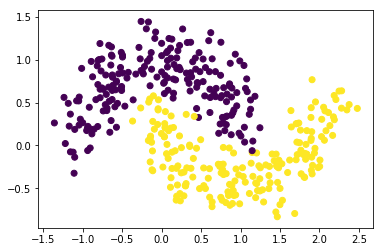

In [6]:
import matplotlib.pyplot as plt
from utils import convert_prob_into_class
%matplotlib inline 

#CLASSIFICATION VISUALIZED
Y_test_hat = nn.forward_propagation(X_test, cloud = nn.get_cloud_mean())
plt.scatter(X_test[:,0],X_test[:,1], c = convert_prob_into_class(Y_test_hat).flatten())